In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import sklearn


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, LSTM, Input,SpatialDropout1D, GlobalMaxPool1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, precision_score, accuracy_score, recall_score, f1_score
from tensorflow.keras.optimizers import Adam

In [3]:
# 5. Membaca file CSV ke dalam DataFrame
import pandas as pd
df = pd.read_csv('dataset_50k.csv')
df.head()

Unnamed: 0  Label                                         detokenize
0           0      1  aku luka diri aku jalan hidup sulit orang tua ...
1           1      0   buang pikir negatif laku gelisah milik putus asa
2           2      1  jujur aku takut mati aku orang aku sulit paham...
3           3      0              saya mes pasang sepatu jam saya harap
4           4      1  capek hati banget aku allah aku kayak mata ora...

In [4]:
df = df.dropna()
df

Unnamed: 0  Label                                         detokenize
0               0      1  aku luka diri aku jalan hidup sulit orang tua ...
1               1      0   buang pikir negatif laku gelisah milik putus asa
2               2      1  jujur aku takut mati aku orang aku sulit paham...
3               3      0              saya mes pasang sepatu jam saya harap
4               4      1  capek hati banget aku allah aku kayak mata ora...
...           ...    ...                                                ...
50518       50518      0  curi rampok liar begal rakyat senantiasa resah...
50519       50519      0                      saya bicara saya buat tertawa
50520       50520      1  sakit sakit guna sakit bahagia sakit bohong or...
50521       50521      1                              lantai lantai gelisah
50522       50522      1  aku tulis catat kemarin kata tunang aku laku b...

[50523 rows x 3 columns]

In [5]:
df['label'] = df['Label'].apply(lambda x: 0 if x == 0 else 1)
df.head()

Unnamed: 0  Label                                         detokenize  label
0           0      1  aku luka diri aku jalan hidup sulit orang tua ...      1
1           1      0   buang pikir negatif laku gelisah milik putus asa      0
2           2      1  jujur aku takut mati aku orang aku sulit paham...      1
3           3      0              saya mes pasang sepatu jam saya harap      0
4           4      1  capek hati banget aku allah aku kayak mata ora...      1

<BarContainer object of 2 artists>

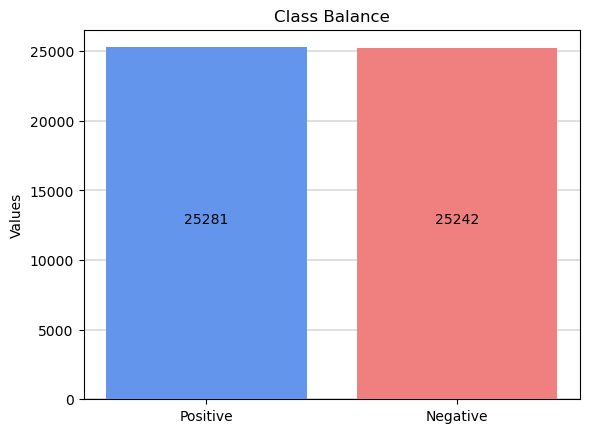

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center',zorder=4)

# Count the values in the 'Label' column
count = df['Label'].value_counts()
x = ["Positive", "Negative"]  # Custom labels for class balance plot
y = [count[1], count[0]]
addlabels(x,y)
plt.ylabel("Values")
plt.title('Class Balance')
plt.grid(color='dimgray', linewidth=0.3, axis='y',zorder=0)
plt.bar(x,y, color= ['cornflowerblue', 'lightcoral'], zorder=3)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vektorisasi teks menggunakan TF-IDF unigram(1,1)
vectorizer = TfidfVectorizer(min_df=10, ngram_range=(1,1), max_df=0.7, max_features=10000)

# Menggunakan fit_transform untuk mengubah dokumen menjadi fitur
vector = vectorizer.fit_transform(df['detokenize']).toarray()
tf_idf_len = len(vectorizer.vocabulary_)

In [8]:
#Split data 70% data train and 30% data test
x_unigram = pd.DataFrame(vector)
label = df["Label"]
x_train, x_test, y_train, y_test =  model_selection.train_test_split(x_unigram,label, test_size = 0.3)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(35366, 3445) (35366,)
(15157, 3445) (15157,)


In [9]:
y_train

5358     0
29064    1
37871    1
20468    0
30403    0
        ..
10087    0
45766    1
19204    1
18955    1
6235     1
Name: Label, Length: 35366, dtype: int64

In [10]:
x_train

0     1     2     3     4     5     6     7     8     9     ...  3435  \
5358    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
29064   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
37871   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
20468   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
30403   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
10087   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
45766   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
19204   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
18955   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
6235    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

       3436  3437  3438  3439  3440  3441  3442  3443  3444  
5358    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
29064   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
37871   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
20468   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
30403   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
10087   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
45766   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
19204   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
18955   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
6235    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[35366 rows x 3445 columns]

In [11]:
x_train = np.array(x_train).reshape(-1, 1, x_train.shape[1])
x_test = np.array(x_test).reshape(-1, 1, x_test.shape[1])

In [12]:
x_train.shape

(35366, 1, 3445)

In [13]:
import matplotlib.pyplot as plt

def make_plot(history, train, validation, title):
    graph = plt.plot(history.history[train], lw=2.0)
    graph = plt.plot(history.history[validation], lw=2.0)
    graph = plt.title(title)
    graph = plt.legend(['training', 'validasi'])
    graph = plt.show()

    return graph

In [14]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Membuat model lstm
def lstm(x_train, y_train, x_test, y_test):


    model = Sequential()
    model.add(Input(shape=(1,x_train.shape[2])))
    model.add(SpatialDropout1D(0.25))
    model.add(LSTM(128, recurrent_dropout=0.2))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
    print(model.summary())

    history = model.fit(x_train, y_train, epochs = 10, validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)] )

    #Membuat plot garis akurasi
    make_plot(history, "accuracy", "val_accuracy", "Perubahan Akurasi tiap epoch")

    #predict
    predictions = model.predict(x_test)
    print()
    print("Classification Report :")
    print(classification_report(y_test, predictions.round(), digits=6))


    acc_score = accuracy_score(y_test, predictions.round())
    prec_score = precision_score(y_test, predictions.round())
    rec_score = recall_score(y_test, predictions.round())
    f1score = f1_score(y_test, predictions.round())

    return [acc_score,prec_score,rec_score,f1score ]


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ spatial_dropout1d               │ (None, 1, 3445)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │     1,829,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,834,049 (7.00 MB)

 Trainable params: 1,834,049 (7.00 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1106/1106 ━━━━━━━━━━━━━━━━━━━━ 35s 27ms/step - accuracy: 0.7425 - loss: 0.5114 - val_accuracy: 0.8194 - val_loss: 0.3755
Epoch 2/10
1106/1106 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - accuracy: 0.8067 - loss: 0.3923 - val_accuracy: 0.8186 - val_loss: 0.3742
Epoch 3/10
1106/1106 ━━━━━━━━━━━━━━━━━━━━ 29s 26ms/step - accuracy: 0.8136 - loss: 0.3747 - val_accuracy: 0.8201 - val_loss: 0.3696
Epoch 4/10
1106/1106 ━━━━━━━━━━━━━━━━━━━━ 29s 26ms/step - accuracy: 0.8129 - loss: 0.3721 - val_accuracy: 0.8221 - val_loss: 0.3670
Epoch 5/10
1106/1106 ━━━━━━━━━━━━━━━━━━━━ 33s 30ms/step - accuracy: 0.8209 - loss: 0.3530 - val_accuracy: 0.8242 - val_loss: 0.3611
Epoch 6/10
1106/1106 ━━━━━━━━━━━━━━━━━━━━ 33s 30ms/step - accuracy: 0.8263 - loss: 0.3466 - val_accuracy: 0.8270 - val_loss: 0.3608
Epoch 7/10
1106/1106 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - accuracy: 0.8307 - loss: 0.3414 - val_accuracy: 0.8269 - val_loss: 0.3585
Epoch 8/10
1106/1106 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - accuracy: 0.8

474/474 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step

Classification Report :
              precision    recall  f1-score   support

           0   0.841974  0.806765  0.823993      7509
           1   0.817759  0.851334  0.834209      7648

    accuracy                       0.829254     15157
   macro avg   0.829866  0.829049  0.829101     15157
weighted avg   0.829755  0.829254  0.829148     15157



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ spatial_dropout1d_1             │ (None, 1, 3445)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │     1,829,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,834,049 (7.00 MB)

 Trainable params: 1,834,049 (7.00 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1106/1106 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.7391 - loss: 0.5126 - val_accuracy: 0.8161 - val_loss: 0.3773
Epoch 2/10
1106/1106 ━━━━━━━━━━━━━━━━━━━━ 26s 24ms/step - accuracy: 0.8045 - loss: 0.3944 - val_accuracy: 0.8211 - val_loss: 0.3703
Epoch 3/10
1106/1106 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 0.8130 - loss: 0.3719 - val_accuracy: 0.8227 - val_loss: 0.3706
Epoch 4/10
1106/1106 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 0.8168 - loss: 0.3649 - val_accuracy: 0.8246 - val_loss: 0.3622
Epoch 5/10
1106/1106 ━━━━━━━━━━━━━━━━━━━━ 27s 24ms/step - accuracy: 0.8229 - loss: 0.3552 - val_accuracy: 0.8264 - val_loss: 0.3577
Epoch 6/10
1106/1106 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - accuracy: 0.8300 - loss: 0.3462 - val_accuracy: 0.8312 - val_loss: 0.3561
Epoch 7/10
1106/1106 ━━━━━━━━━━━━━━━━━━━━ 33s 30ms/step - accuracy: 0.8350 - loss: 0.3360 - val_accuracy: 0.8264 - val_loss: 0.3588
Epoch 8/10
1106/1106 ━━━━━━━━━━━━━━━━━━━━ 34s 30ms/step - accuracy: 0.8

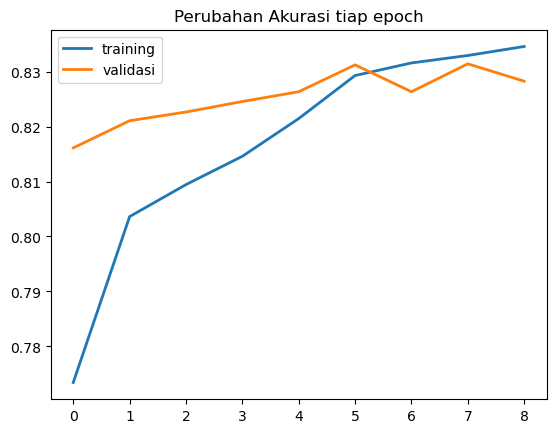

474/474 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step

Classification Report :
              precision    recall  f1-score   support

           0   0.831755  0.819017  0.825337      7509
           1   0.824939  0.837343  0.831095      7648

    accuracy                       0.828264     15157
   macro avg   0.828347  0.828180  0.828216     15157
weighted avg   0.828316  0.828264  0.828242     15157



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ spatial_dropout1d_2             │ (None, 1, 3445)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │     1,829,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,834,049 (7.00 MB)

 Trainable params: 1,834,049 (7.00 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1106/1106 ━━━━━━━━━━━━━━━━━━━━ 79s 38ms/step - accuracy: 0.8427 - loss: 0.3272 - val_accuracy: 0.8262 - val_loss: 0.3612


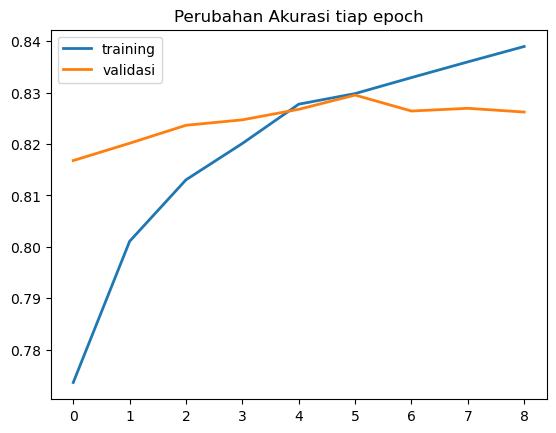

474/474 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step

Classification Report :
              precision    recall  f1-score   support

           0   0.833767  0.810894  0.822171      7509
           1   0.819200  0.841266  0.830086      7648

    accuracy                       0.826219     15157
   macro avg   0.826484  0.826080  0.826129     15157
weighted avg   0.826417  0.826219  0.826165     15157



In [15]:
result = []
result.append(lstm(x_train, y_train, x_test, y_test))
result.append(lstm(x_train, y_train, x_test, y_test))
result.append(lstm(x_train, y_train, x_test, y_test))

In [16]:
average = np.mean(result, axis=0, dtype=float)
print('Average Accuracy  :', average[0])
print('Average Precision :', average[1])
print('Average Recall    :', average[2])
print('Average F1-Score  :', average[3])

Average Accuracy  : 0.827912295748939
Average Precision : 0.8206328588986732
Average Recall    : 0.8433141562064157
Average F1-Score  : 0.8317966511941973
